In [51]:
import pandas as pd
import numpy as np

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [53]:
data=pd.read_csv("C:\\Users\\BIDISHA HALDAR\\Downloads\\spam.csv", encoding="latin-1")

In [54]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [56]:
data['Category']=data['Category'].map({'ham':0,'spam':1})

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x=data['Message']
y=data["Category"]

In [60]:
x.shape

(5572,)

In [61]:
y.shape

(5572,)

In [62]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [63]:
cv=CountVectorizer()

In [64]:
x=cv.fit_transform(x)

In [65]:
x_train, x_test ,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
x_train.shape

(4457, 8745)

In [67]:
x_test.shape

(1115, 8745)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
model=MultinomialNB()

In [70]:
model.fit(x_train,y_train)

MultinomialNB()

In [71]:
model.score(x_test,y_test)

0.9856502242152466

In [72]:
msg="You Won 500$"
data=[msg]
vect=cv.transform(data).toarray()
my_prediction=model.predict(vect)

In [73]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

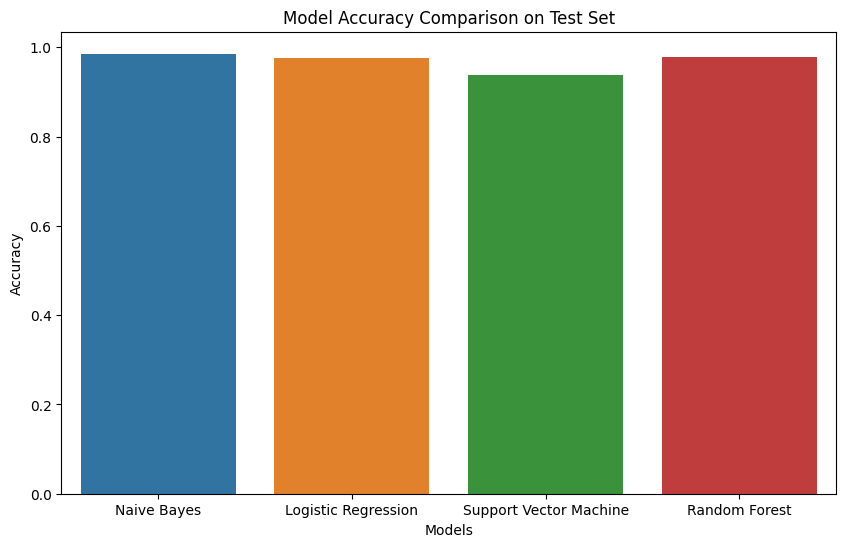

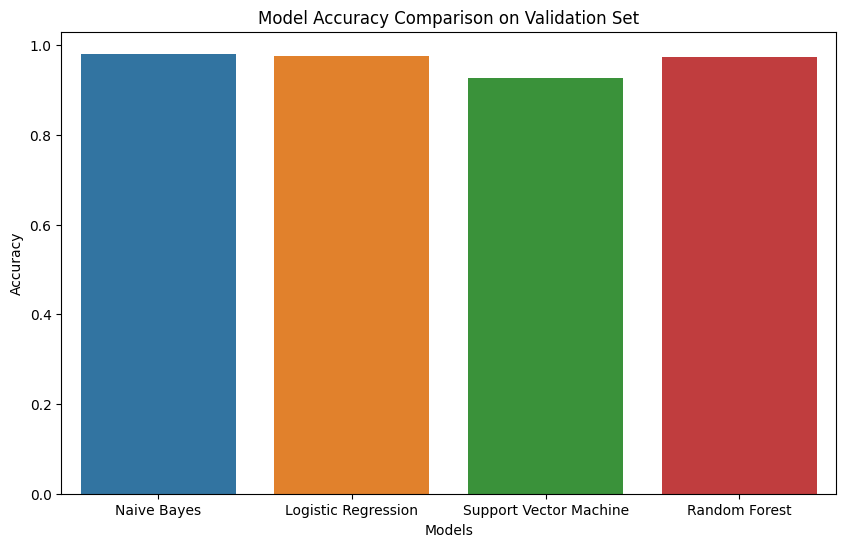

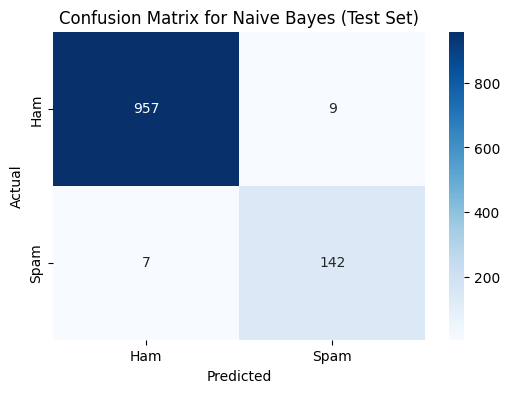

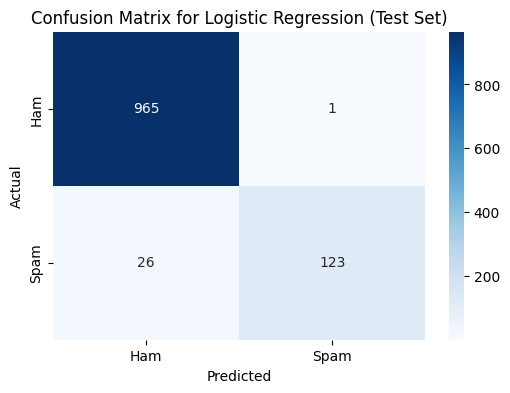

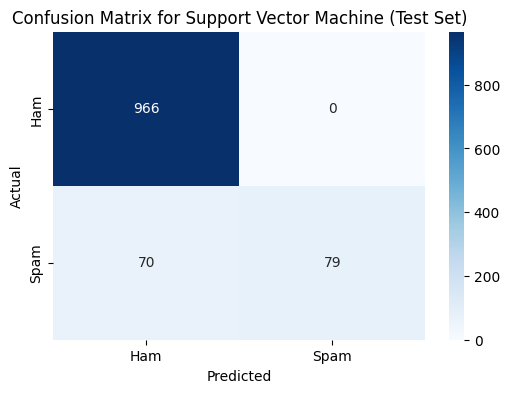

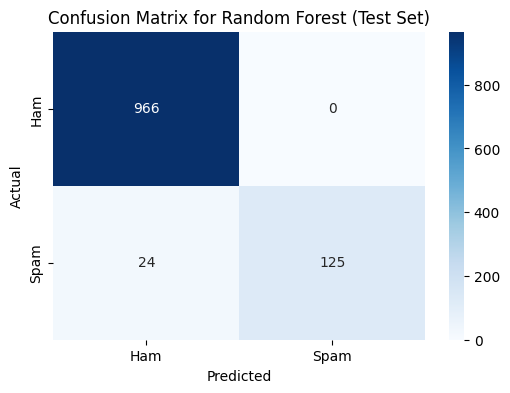

In [74]:
from sklearn.model_selection import train_test_split

# Splitting training data into train and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Scaling the data for models like Logistic Regression and SVM
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train_split.toarray())  # Convert sparse matrix to array for scaling
x_val_scaled = scaler.transform(x_val_split.toarray())
x_test_scaled = scaler.transform(x_test.toarray())

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train models and store accuracies, validation scores, and confusion matrices
accuracies = {}
validation_scores = {}
conf_matrices = {}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(x_train_scaled, y_train_split)  # Use scaled data for these models
        y_val_pred = model.predict(x_val_scaled)
        y_test_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train_split, y_train_split)  # Use original data for Naive Bayes and Random Forest
        y_val_pred = model.predict(x_val_split)
        y_test_pred = model.predict(x_test)

    # Store accuracies and validation scores
    validation_scores[model_name] = accuracy_score(y_val_split, y_val_pred)
    accuracies[model_name] = accuracy_score(y_test, y_test_pred)
    conf_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison on Test Set')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Plotting validation accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(validation_scores.keys()), y=list(validation_scores.values()))
plt.title('Model Accuracy Comparison on Validation Set')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Plotting Confusion Matrices for the test set
for model_name in models.keys():
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrices[model_name], annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name} (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [75]:
import pickle
pickle.dump(model,open('spam1234.pkl','wb'))
#model1=pickle.load(open('spam.pkl','rb'))

In [76]:
import pickle
pickle.dump(cv,open('vec1234.pkl','wb'))